In [1]:
import numpy as np
from math import cos, pi, atan2, sin, acos

T = 1
delta = 0.01
l1 = 1
l2 = 1
l3 = 2
R = 2
H = 1.5

def OA(z):
    if (z < l2-l3):
        return l1
    elif (z < 0):
        return ((l3 - l2)**2 - z**2)**(1/2) + l1
    elif (z < l3):
        return (l3**2 - z**2)**(1/2) + l1 - l2
    else: 
        return l1

def OB(z):
    return (((l3 + l2)**2 - z**2)**(1/2) + l1)

r0 = [0, ((OB(-H) + OA(-H)) / 2), -H]
phi0 = atan2(r0[0], r0[1])
psi0 = acos((l2**2 + H**2 - l3**2 + ((r0[0]**2 + r0[1]**2)**(1/2) - l1)**2)/
           (2 * l2 * (H**2 + ((r0[0]**2 + r0[1]**2)**(1/2) - l1)**2)**(1/2))) - atan2(H, ((r0[0]**2 + r0[1]**2)**(1/2) - l1))
gamma0 = (pi/2) - psi0 - acos((l2**2 - H**2 + l3**2 - ((r0[0]**2 + r0[1]**2)**(1/2) - l1)**2)/(2*l2*l3))

phimax = 2 * (pi / 3) - acos(R / (2 * (l1 + l2 + l3)))
if (phimax > 2 * (pi / 3)):
    phimax = 2 * (pi / 3)

def cosvec(vec1, vec2):
    return abs(np.dot(vec1,vec2)) / ((np.dot(vec1,vec1))**(1/2) * (np.dot(vec2,vec2))**(1/2))
def neg(vec):
    return [-vec[0], -vec[1], -vec[2]]
def vecr(vec1, vec2):
    vec = np.array([vec2[0] - vec1[0],
                   vec2[1] - vec1[1],
                   vec2[2] - vec1[2]])
    return (np.dot(vec,vec))**(1/2)

iv = [1, 0, 0]
jv = [0, 1, 0]

def tau(t):
    return -(pi/2)*(1 + cos(pi * t / T))
def dtau(t): 
    return (pi/2)*(pi/T)*sin(pi * t / T)

def pcur(current, target):
    return [(target[0] - current[0]), (target[1] - current[1]), 0]

def Jacobian(an):
    return np.array([[(-sin(an[0]) * (l3*cos(an[1] + an[2]) + l2*cos(an[1]) + l1)), (-cos(an[0]) * (l3*sin(an[1] + an[2]) + l2*sin(an[1]))), (-l3 * cos(an[0]) * sin(an[1] + an[2]))],
                    [(cos(an[0]) * (l3*cos(an[1] + an[2]) + l2*cos(an[1]) + l1)), (-sin(an[0]) * (l3*sin(an[1] + an[2]) + l2*sin(an[1]))), (-l3 * sin(an[0]) * sin(an[1] + an[2]))],
                    [0, (l3*cos(an[1] + an[2]) + l2*cos(an[1])), (l3 * cos(an[1] + an[2]))]])

#tar = np.arange(0, T+delta, delta)
#for _t in tar:
#    print(tau(_t), (1/2) + (1/2) * cos(tau(_t)))

In [2]:
def vecleg(n, vec):   #перевод из общей в ногу 
    alpha = -(pi / 3) + (pi / 3) * n
    T = np.array([[cos(alpha), -sin(alpha), 0, R * cos(alpha + (pi/2))],
                 [sin(alpha), cos(alpha), 0, R * sin(alpha + (pi/2))],
                 [0, 0, 1, 0],
                 [0, 0, 0, 1]])
    result = np.dot(np.linalg.inv(T), np.array([vec[0], vec[1], vec[2], 1]))
    return np.array([result[0], result[1], result[2]])
def vechexapod(n, vec):    #перевод из ноги в общую 
    alpha = -(pi/3) + (pi / 3) * n
    T = np.array([[cos(alpha), -sin(alpha), 0, R * cos(alpha + (pi/2))],
                 [sin(alpha), cos(alpha), 0, R * sin(alpha + (pi/2))],
                 [0, 0, 1, 0],
                 [0, 0, 0, 1]])
    result = np.dot(T, np.array([vec[0], vec[1], vec[2], 1]))
    return np.array([result[0], result[1], result[2]])
print(r0)
for i in range(6):
    print(vechexapod(i,r0))

[0, 2.299038105676658, -1.5]
[ 3.72307621  2.14951905 -1.5       ]
[ 1.22464680e-16  4.29903811e+00 -1.50000000e+00]
[-3.72307621  2.14951905 -1.5       ]
[-3.72307621 -2.14951905 -1.5       ]
[-6.48945005e-16 -4.29903811e+00 -1.50000000e+00]
[ 3.72307621 -2.14951905 -1.5       ]


In [3]:
def lmax(p, current, number):
    if number%2 == 0:
        p = -p
    norm_sq = abs(np.dot(np.cross(neg(current), p), np.cross(neg(current), p))) / (np.dot(p,p)) #квадрат расстояния до прямой
    m = (np.dot(current, current) - norm_sq)**(1/2) / (np.dot(p,p))**(1/2)
    k = ((OB(current[2]))**2 + current[2]**2 - norm_sq)**(1/2) / (np.dot(p,p))**(1/2)
    q = ((OA(current[2]))**2 + current[2]**2 - norm_sq)**(1/2) / (np.dot(p,p))**(1/2)
    if (cosvec(p, neg(current)) <= 0):
        l =  (k - m) * (np.dot(p,p))**(1/2)
        #print(l, k, m)
    else:
        if (norm_sq > ((OA(current[2]))**2 + current[2]**2)):
            l = (k + m) * (np.dot(p,p))**(1/2)
            #print(l)
        else:
            l = (m - q) * (np.dot(p,p))**(1/2)
            #print(l)
    if (cosvec(jv, (current + np.array([(l / ((np.dot(p,p))**(1/2))) * p[0], 
                                      (l / ((np.dot(p,p))**(1/2))) * p[1],
                                      (l / ((np.dot(p,p))**(1/2))) * p[2]]))) < cos(phimax)):
        #print((current[0] * cos(phimax) + current[1] * cos(phimax - (pi/2))))
        #print((-current[0] * cos(phimax) + current[1] * cos(phimax - (pi/2))) / (p[0] * cos(phimax) - p[1] * cos(phimax - (pi/2))))
        return abs(((-current[0] * cos(phimax) + current[1] * cos(phimax - (pi/2))) 
                / (p[0] * cos(phimax) - p[1] * cos(phimax - (pi/2)))) * (np.dot(p,p))**(1/2))
    else:
        return l

def lmaxall(p):
    result = lmax(vecleg(0, p), r0, 0)
    for i in range(5):
        l = lmax(vecleg(i+1, p), r0, i+1)
        if (l < result):
            result = l
    return result

def lcur(current, next_point):
    l = 0.9 * lmaxall(pcur(current, next_point))
    if ((l * 2) > vecr(next_point, current)):
        #print(vecr(next_point, current))
        return vecr(next_point, current) / 2
    else:
        return l

def hmax(p, l, number):
    if number%2 == 0:
        p = -p
    end = [(l / ((np.dot(p,p))**(1/2))) * p[0] + r0[0], 
           (l / ((np.dot(p,p))**(1/2))) * p[1] + r0[1],
           (l / ((np.dot(p,p))**(1/2))) * p[2] + r0[2]]
    zbegin = ((l2 + l3)**2 - ((r0[0]**2 + r0[1]**2)**(1/2) - l1)**2)**(1/2)
    zend = ((l2 + l3)**2 - ((end[0]**2 + end[1]**2)**(1/2) - l1)**2)**(1/2)
    if (zbegin <= zend):
        return zbegin - r0[2]
    else:
        return zend - r0[2]

print(((l2 + l3)**2 - ((r0[0]**2 + r0[1]**2)**(1/2) - l1)**2)**(1/2) - r0[2])
l = lcur([10, 10, H], [10, 15, H])
p = vecleg(1, pcur([10, 10, H], [10, 15, H]))
print([(l / ((np.dot(p,p))**(1/2))) * p[0] + r0[0], 
                (l / ((np.dot(p,p))**(1/2))) * p[1] + r0[1],
                (l / ((np.dot(p,p))**(1/2))) * p[2] + r0[2]])
print(r0)
print(hmax(vecleg(1, pcur([10, 10, H], [10, 15, H])), lcur([10, 10, H], [10, 15, H]), 1))

4.204163456597993
[-4.7725885742620815e-17, 3.46817240078565, -1.5]
[0, 2.299038105676658, -1.5]
3.2053225501353113


c:\users\nikita litvinov\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


In [4]:
def trpoint(point1, point2):
    eps = 0.001
    if (abs(point1[0] - point2[0]) < eps):
        if (abs(point1[1] - point2[1]) < eps):
            if (abs(point1[2] - point2[2]) < eps):
                return True
            else:
                return False
        else:
            return False
    else:
        return False

points = [[10, 10, H], [10, 15, H], [15, 15, H], [20, 20, H]]

def walk(points):
    hexapod = [points[0]]
    r = [[r0] for n in range(6)]
    dr = [[[0, 0, 0]] for w in range(6)]
    angles = [[[phi0, psi0, gamma0]] for g in range(6)]
    switch = []
    index = 0
    larray = []
    _h = 0.5
    for i in range(3):
        current = points[i]
        _p = pcur(current, points[i+1])
        while (trpoint(current, points[i+1]) == False):
            _l = lcur(current, points[i+1])
            larray.append(_l)
            index += 1;
            for _t in np.arange(0, 2*T+delta, delta):
                if (_t <= T):
                    hexapod.append([((_l/2) + (_l/2) * cos(tau(_t))) * cosvec(_p,iv) + current[0],
                                   ((_l/2) + (_l/2) * cos(tau(_t))) * cosvec(_p,jv) + current[1],
                                  current[2]])
                    for k in range(6):
                        pleg = vecleg(k, _p)
                        #_h = hmax(pleg, _l, k)
                        if (k % 2 == 0):
                            r[k].append([((_l/2) + (_l/2) * cos(tau(_t))) * cosvec(neg(pleg),iv) + r0[0],
                                        ((_l/2) + (_l/2) * cos(tau(_t))) * cosvec(neg(pleg),jv) + r0[1],
                                        r0[2]])
                            dr[k].append([-(_l/2) * sin(tau(_t)) * dtau(_t) * cosvec(neg(pleg),iv),
                                         -(_l/2) * sin(tau(_t)) * dtau(_t) * cosvec(neg(pleg),jv),
                                         0])
                        else:
                            r[k].append([((_l/2) + (_l/2) * cos(tau(_t))) * cosvec(pleg,iv) + r0[0],
                                        ((_l/2) + (_l/2) * cos(tau(_t))) * cosvec(pleg,jv) + r0[1],
                                        r0[2] - _h * sin(tau(_t))])
                            dr[k].append([-(_l/2) * sin(tau(_t)) * dtau(_t) * cosvec(pleg,iv),
                                         -(_l/2) * sin(tau(_t)) * dtau(_t) * cosvec(pleg,jv),
                                         -_h * dtau(_t) * cos(tau(_t))])
                        angles[k].append(angles[k][-1] + np.dot(np.linalg.inv(Jacobian(angles[k-1][-1])), dr[k][-1]) * delta)         
                else:
                    hexapod.append([((_l/2)*3 + (_l/2) * cos(tau(_t - T))) * cosvec(_p,iv) + current[0],
                                   ((_l/2)*3 + (_l/2) * cos(tau(_t - T))) * cosvec(_p,jv) + current[1],
                                  current[2]])
                    for k in range(6):
                        pleg = vecleg(k, _p)
                        #_h = hmax(pleg, _l, k)
                        if (k % 2 == 0):
                            r[k].append([((_l/2) + (_l/2) * cos(-tau(_t))) * cosvec(pleg,iv) + r[k][index*2*T][0],
                                        ((_l/2) + (_l/2) * cos(-tau(_t))) * cosvec(pleg,jv) + r[k][index*2*T][1],
                                        r[k][index*2*T][2] - _h * sin(tau(_t - T))])
                            dr[k].append([(_l/2) * dtau(_t) * sin(-tau(_t)) * cosvec(pleg,iv),
                                         (_l/2) * dtau(_t) * sin(-tau(_t)) * cosvec(pleg,jv),
                                         _h * dtau(_t) * cos(-tau(_t))])
                        else:
                            r[k].append([((_l/2) + (_l/2) * cos(-tau(_t))) * cosvec(neg(pleg),iv) + r[k][index*2*T][0],
                                        ((_l/2) + (_l/2) * cos(-tau(_t))) * cosvec(neg(pleg),jv) + r[k][index*2*T][1],
                                        r[k][index*2*T][2]])
                            dr[k].append([(_l/2) * dtau(_t) * sin(-tau(_t)) * cosvec(neg(pleg),iv),
                                         (_l/2) * dtau(_t) * sin(-tau(_t)) * cosvec(neg(pleg),jv),
                                         0])
                        angles[k].append(angles[k][-1] + np.dot(np.linalg.inv(Jacobian(angles[k][-1])), dr[k][-1]) * delta)
            current = hexapod[-1]
        switch.append(index)
    return hexapod, r, angles, switch, larray

walkarray = walk(points)

c:\users\nikita litvinov\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


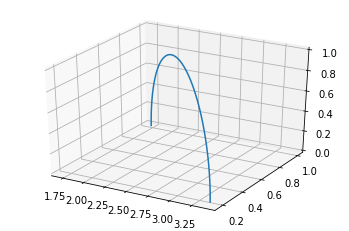

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

t = np.arange(0, T, delta)
pleg = [3,2,-H]
_l = 2
_h = 1
for i in range(3):
    for _t in t:
        x.append(((_l/2) + (_l/2) * cos(tau(_t))) * cosvec(pleg,iv) + i*r0[0])
        y.append(((_l/2) + (_l/2) * cos(tau(_t))) * cosvec(pleg,jv) + i*r0[1])
        z.append(i*r0[2] - _h * sin(tau(_t)))

for i in range(len(3*t)):
    x1.append(i)
    x2.append(i)
    x3.append(0)
    xh.append(vechexapod(0, [x[i], y[i], z[i]])[0] )
    yh.append(vechexapod(0, [x[i], y[i], z[i]])[1] )
    zh.append(vechexapod(0, [x[i], y[i], z[i]])[2] )
plt.gca(projection='3d') 
plt.plot(xh, yh, zh)

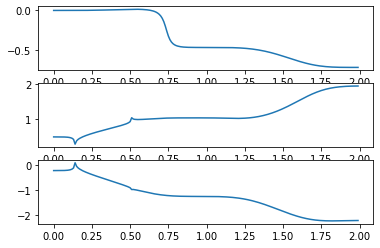

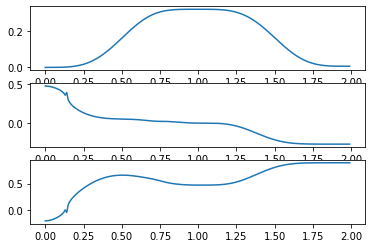

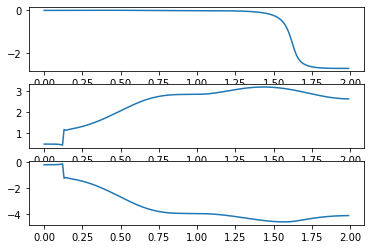

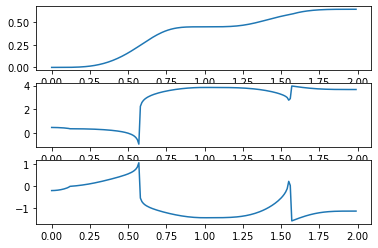

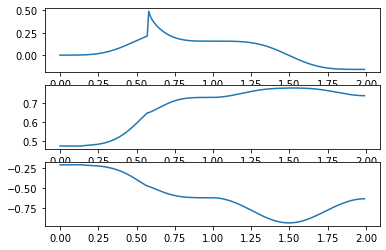

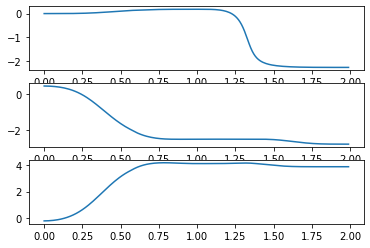

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

t = np.arange(0, 2 * T, delta)
phi = []
psi = []
gamma = []
for i in range(len(t)):
    phi.append(walkarray[2][0][i+1][0])
    psi.append(walkarray[2][0][i+1][1])
    gamma.append(walkarray[2][0][i+1][2])
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=False)
ax1.plot(t, phi)
ax2.plot(t, psi)
ax3.plot(t, gamma)

t = np.arange(0, 2 * T, delta)
phi = []
psi = []
gamma = []
for i in range(len(t)):
    phi.append(walkarray[2][1][i+1][0])
    psi.append(walkarray[2][1][i+1][1])
    gamma.append(walkarray[2][1][i+1][2])
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=False)
ax1.plot(t, phi)
ax2.plot(t, psi)
ax3.plot(t, gamma)

t = np.arange(0, 2 * T, delta)
phi = []
psi = []
gamma = []
for i in range(len(t)):
    phi.append(walkarray[2][2][i+1][0])
    psi.append(walkarray[2][2][i+1][1])
    gamma.append(walkarray[2][2][i+1][2])
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=False)
ax1.plot(t, phi)
ax2.plot(t, psi)
ax3.plot(t, gamma)

t = np.arange(0, 2 * T, delta)
phi = []
psi = []
gamma = []
for i in range(len(t)):
    phi.append(walkarray[2][3][i+1][0])
    psi.append(walkarray[2][3][i+1][1])
    gamma.append(walkarray[2][3][i+1][2])
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=False)
ax1.plot(t, phi)
ax2.plot(t, psi)
ax3.plot(t, gamma)

t = np.arange(0, 2 * T, delta)
phi = []
psi = []
gamma = []
for i in range(len(t)):
    phi.append(walkarray[2][4][i+1][0])
    psi.append(walkarray[2][4][i+1][1])
    gamma.append(walkarray[2][4][i+1][2])
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=False)
ax1.plot(t, phi)
ax2.plot(t, psi)
ax3.plot(t, gamma)

t = np.arange(0, 2 * T, delta)
phi = []
psi = []
gamma = []
for i in range(len(t)):
    phi.append(walkarray[2][5][i+1][0])
    psi.append(walkarray[2][5][i+1][1])
    gamma.append(walkarray[2][5][i+1][2])
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=False)
ax1.plot(t, phi)
ax2.plot(t, psi)
ax3.plot(t, gamma)



[10, 10, 1.5]


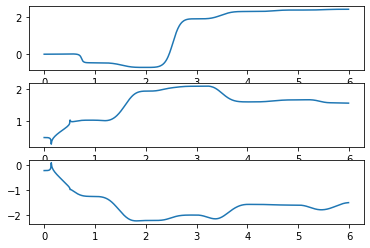

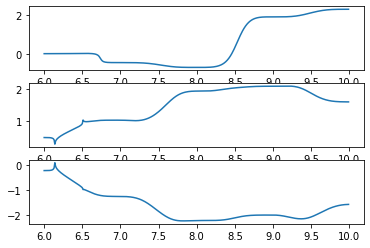

In [7]:
print(walkarray[0][0])

t = np.arange(0, walkarray[3][0] * 2 * T, delta)
phi1 = []
psi1 = []
gamma1 = []
for i in range(len(t)):
    phi1.append(walkarray[2][0][i+1][0])
    psi1.append(walkarray[2][0][i+1][1])
    gamma1.append(walkarray[2][0][i+1][2])
f1, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=False)
ax1.plot(t, phi1)
ax2.plot(t, psi1)
ax3.plot(t, gamma1)

t = np.arange(walkarray[3][0] * 2 * T, walkarray[3][1] * 2 * T, delta)
phi1 = []
psi1 = []
gamma1 = []
for i in range(len(t)):
    phi1.append(walkarray[2][0][i+1][0])
    psi1.append(walkarray[2][0][i+1][1])
    gamma1.append(walkarray[2][0][i+1][2])
f1, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=False)
ax1.plot(t, phi1)
ax2.plot(t, psi1)
ax3.plot(t, gamma1)

In [ ]:
hexa = [[],[],[]]
i = 0
for vec in walkarray[0]:
    for j in range(3):
        hexa[j].append(vec[j])
    i +=1
lmap = walkarray[4]
print(lmap)
r = list([list([[vechexapod(i,r0)[j] + hexa[j][0]] for j in range(3)]) for i in range(6)])
_h = 0.5
pmap = [pcur(points[i], points[i+1]) for i in range(3)]
switchp = walkarray[3]
print(switchp, pmap)
i = 0
f = 0
_p = pmap[0]
for _l in lmap:
    i += 1
    for _t in np.arange(0, 2*T, delta):
        f += 1
        for n in range(6):
            r[n][0].append(((_l) + (_l) * cos(tau(_t/2))) * cosvec(_p,iv) + r[n][0][0] + hexa[0][f])
            r[n][1].append(((_l) + (_l) * cos(tau(_t/2))) * cosvec(_p,jv) + r[n][1][0] + hexa[1][f])
            r[n][2].append(- _h * sin(tau(_t/2)))
    if (i  == 3):
        _p = pmap[1]
    elif (i == 5):
        _p = pmap[2]
import mpl_toolkits.mplot3d

rone = [[] for i in range(3)]
for i in range(20):
    rone[0].append(r[0][0][i])
    rone[1].append(r[0][1][i])
    rone[2].append(r[0][2][i])

fig = plt.figure()
#ax  = fig.add_subplot(111, projection='3d')
#ax1 = fig.add_subplot(111, projection='3d')
plt.gca(projection='3d')
plt.plot(rone[0], rone[1], rone[2])
#plt.plot(hexa[0], hexa[1], hexa[2])
#plt.plot(r[0][0], r[0][1], r[0][2],
        #r[1][0], r[1][1], r[1][2],
        #r[2][0], r[2][1], r[2][2],
        #r[3][0], r[3][1], r[3][2],
        #r[4][0], r[4][1], r[4][2],
        #r[5][0], r[5][1], r[5][2])